In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Wczytywanie danych

In [222]:
data = pd.read_excel('AER_2013_1483_data/CalomirisPritchett_data.xlsx')
display(data)

,ID number,Conveyance,Page,Researcher,Notary First Name,Notary Last Name,Sales Date,Sellers First Name,Sellers Last Name,Sellers County of Origin,...,Interest Rate,Discount Rate,predicted rate,Calculations,Ratio,PresentValue,DUMMY omission,Reason for Omission,Comments,DUMMY Estate Sale
0,1,70,348,MS,John French,Coffey,10/6/1856,Benjamin,Screws,.,...,NaN,0.006027,0.074770,NaN,NaN,NaN,0,NaN,NaN,NaN
1,2,70,349,MS,William,Shannon,10/7/1856,Santiago,Galseran,New Orleans,...,NaN,0.006027,0.074770,NaN,NaN,NaN,0,NaN,NaN,NaN
2,3,70,351,MS,Edward George,Gottschalk,10/1/1856,Pierre,Macou,New Orleans,...,NaN,0.006027,0.074770,NaN,NaN,NaN,0,NaN,NaN,NaN
3,4,70,352,MS,Paul Emile,Laresche,10/8/1856,Benjamin Franklin,Irby,Vanzand,...,NaN,0.006027,0.074770,NaN,NaN,NaN,0,NaN,NaN,NaN
4,5,70,352,MS,George,Rareshide,10/8/1856,Richard,Condon,New Orleans,...,NaN,0.006027,0.074770,NaN,NaN,NaN,0,NaN,NaN,NaN
5,6,70,353,MS,Octave,De Armas,10/6/1856,Laurent,Roger,New Orleans,...,NaN,0.006027,0.074770,NaN,NaN,NaN,1,OMIT: Condition of emancipation,Courcelle is a FPC. Condition of Emancipation....,NaN
6,7,70,353,MS,William,Shannon,10/4/1856,Rosslynne Cumming,Vass,New Orleans,...,NaN,0.006027,0.074770,NaN,NaN,NaN,0,NaN,NaN,NaN
7,8,70,356,MS,Paul Emile,Laresche,10/20/1856,Polly,Reason,New Orleans,...,0.08,0.005791,0.071746,NaN,NaN,1200,1,OMIT: Group sale,"Reason, aka Raison a FPC. Falkner is a FPC. No...",NaN
8,9,70,356,MS,Paul Emile,Laresche,10/20/1856,Polly,Reason,New Orleans,...,NaN,0.006027,0.074770,NaN,NaN,NaN,1,OMIT: Group sale,"Reason, aka Raison a FPC. Falkner is a FPC. No...",NaN
9,10,70,360,MS,Daniel Israel,Ricardo,11/8/1856,Archibald,Lilly,New Orleans,...,NaN,0.006027,0.074770,NaN,NaN,NaN,0,NaN,NaN,NaN


# Czyszczenie danych 

In [223]:
data = data[data['Family Relationship'] == '.'][data['Sex'] != '.'][data['Age'] != '.'][data['Price'] != '.'][data['Price'].notnull()]
data = data[data['Price'] != '233.33 1/3']
data = data[data['Price'] < 5000]
data = data[data['Price'] > 100]
data = data[data['Sales Date'] != '.']

data['Sales Date M'] = [[int(b) for b in a.split('/') if b!='.'][0] for a in data['Sales Date']]
data['Sales Date Y'] = [[b for b in a.split('/')][2] for a in data['Sales Date']]
data['Sex'] = [1 if gender == 'F' else 0 for gender in data['Sex']]
display(data)

/home/jstolarz/ai/.virtualenv/ai/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,ID number,Conveyance,Page,Researcher,Notary First Name,Notary Last Name,Sales Date,Sellers First Name,Sellers Last Name,Sellers County of Origin,...,predicted rate,Calculations,Ratio,PresentValue,DUMMY omission,Reason for Omission,Comments,DUMMY Estate Sale,Sales Date M,Sales Date Y
0,1,70,348,MS,John French,Coffey,10/6/1856,Benjamin,Screws,.,...,0.074770,NaN,NaN,NaN,0,NaN,NaN,NaN,10,1856
1,2,70,349,MS,William,Shannon,10/7/1856,Santiago,Galseran,New Orleans,...,0.074770,NaN,NaN,NaN,0,NaN,NaN,NaN,10,1856
2,3,70,351,MS,Edward George,Gottschalk,10/1/1856,Pierre,Macou,New Orleans,...,0.074770,NaN,NaN,NaN,0,NaN,NaN,NaN,10,1856
3,4,70,352,MS,Paul Emile,Laresche,10/8/1856,Benjamin Franklin,Irby,Vanzand,...,0.074770,NaN,NaN,NaN,0,NaN,NaN,NaN,10,1856
4,5,70,352,MS,George,Rareshide,10/8/1856,Richard,Condon,New Orleans,...,0.074770,NaN,NaN,NaN,0,NaN,NaN,NaN,10,1856
6,7,70,353,MS,William,Shannon,10/4/1856,Rosslynne Cumming,Vass,New Orleans,...,0.074770,NaN,NaN,NaN,0,NaN,NaN,NaN,10,1856
7,8,70,356,MS,Paul Emile,Laresche,10/20/1856,Polly,Reason,New Orleans,...,0.071746,NaN,NaN,1200,1,OMIT: Group sale,"Reason, aka Raison a FPC. Falkner is a FPC. No...",NaN,10,1856
9,10,70,360,MS,Daniel Israel,Ricardo,11/8/1856,Archibald,Lilly,New Orleans,...,0.074770,NaN,NaN,NaN,0,NaN,NaN,NaN,11,1856
10,11,70,360,MS,Daniel Israel,Ricardo,11/8/1856,George R.,Dent,.,...,0.074770,NaN,NaN,NaN,0,NaN,NaN,NaN,11,1856
11,12,70,361,MS,Daniel Israel,Ricardo,11/7/1856,Almazen,Huston,Smith,...,0.075896,NaN,NaN,950,0,NaN,NaN,NaN,11,1856


In [224]:
msk = np.random.rand(len(data)) < 0.8
train = data[msk]
test = data[~msk]
print(f'Wielkość zbioru uczącego: {len(train)}\nWielkosć zbioru testowego: {len(test)}')

Wielkość zbioru uczącego: 8106
Wielkosć zbioru testowego: 1986


# Regresja 

### Prosta regresja na wyczyszczonych danych

/home/jstolarz/ai/.virtualenv/ai/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 2.457751975473695e-24 / 1.1102230246251565e-16
  RuntimeWarning)


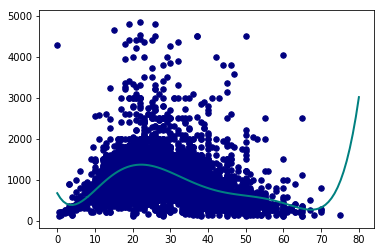

In [169]:
x_plot = np.linspace(0, 80, 100)
lw = 2

model = make_pipeline(PolynomialFeatures(6), Ridge())
model.fit(train['Age'].values.reshape(-1, 1), train['Price'].values.reshape(-1, 1))
y_plot = model.predict(x_plot.reshape(-1, 1))
plt.plot(x_plot, y_plot, color='teal', linewidth=lw)

plt.scatter(train['Age'].values.reshape(-1, 1), train['Price'].values.reshape(-1, 1), color='navy', s=30, marker='o', label="training points")
plt.show()

In [170]:
score = model.score(test['Age'].values.reshape(-1, 1), test['Price'].values.reshape(-1, 1))
error = mean_squared_error(test['Price'].values.reshape(-1, 1), model.predict(test['Age'].values.reshape(-1, 1)))

print(f"Poprawnosć predykcji wynosi: {score}")
print(f"Błąd średniokwadratowy wynosi: {error}")

Poprawnosć predykcji wynosi: 0.2753650424530645
Błąd średniokwadratowy wynosi: 178522.2299493244


### Rozdział kobiet i mężczyzn

/home/jstolarz/ai/.virtualenv/ai/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.149605660293339e-24 / 1.1102230246251565e-16
  RuntimeWarning)
/home/jstolarz/ai/.virtualenv/ai/lib/python3.6/site-packages/scipy/linalg/basic.py:40: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number/precision: 4.1021987106837595e-24 / 1.1102230246251565e-16
  RuntimeWarning)


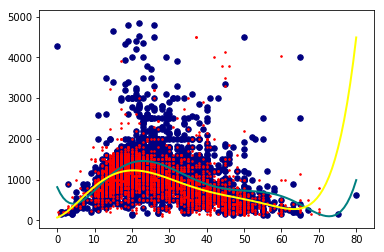

In [226]:
x_plot = np.linspace(0, 80, 100)
lw = 2

train_m = train[train['Sex'] == 0]
test_m = test[test['Sex'] == 0]

train_f = train[train['Sex'] == 1]
test_f = test[test['Sex'] == 1]


model_m = make_pipeline(PolynomialFeatures(6), Ridge())
model_f = make_pipeline(PolynomialFeatures(6), Ridge())

model_m.fit(train_m['Age'].values.reshape(-1, 1), train_m['Price'].values.reshape(-1, 1))
model_f.fit(train_f['Age'].values.reshape(-1, 1), train_f['Price'].values.reshape(-1, 1))

y_plot = model_m.predict(x_plot.reshape(-1, 1))
plt.plot(x_plot, y_plot, color='teal', linewidth=lw)

y_plot = model_f.predict(x_plot.reshape(-1, 1))
plt.plot(x_plot, y_plot, color='yellow', linewidth=lw)

plt.scatter(train_m['Age'].values.reshape(-1, 1), train_m['Price'].values.reshape(-1, 1), color='navy', s=30, marker='o', label="training points")
plt.scatter(train_f['Age'].values.reshape(-1, 1), train_f['Price'].values.reshape(-1, 1), color='red', s=10, marker='.', label="training points")

plt.show()

In [172]:
scoreM = model_m.score(test_m['Age'].values.reshape(-1, 1), test_m['Price'].values.reshape(-1, 1))
scoreF = model_f.score(test_f['Age'].values.reshape(-1, 1), test_f['Price'].values.reshape(-1, 1))

error = mean_squared_error(list(test_m['Price'].values.reshape(-1, 1))+list(test_f['Price'].values.reshape(-1, 1)),
                           list(model_m.predict(test_m['Age'].values.reshape(-1, 1)))+list(model_f.predict(test_f['Age'].values.reshape(-1, 1))))

print(f"Poprawnosć predykcji mężczyzn wynosi: {scoreM}")
print(f"Poprawnosć predykcji kobiet wynosi: {scoreF}")
print(f"Błąd średniokwadratowy wynosi: {error}")

Poprawnosć predykcji mężczyzn wynosi: 0.2180588208298574
Poprawnosć predykcji kobiet wynosi: 0.3111750631705754
Błąd średniokwadratowy wynosi: 172328.94858399223


###  Podział na miesiące

/home/jstolarz/ai/.virtualenv/ai/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/home/jstolarz/ai/.virtualenv/ai/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/home/jstolarz/ai/.virtualenv/ai/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
/home/jstolarz/ai/.virtualenv/ai/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/jstolarz/ai/.virtualenv/ai/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.
/home/jstolarz/ai/.virtualenv/ai/lib/python3.6/site-packages/ipykernel_la

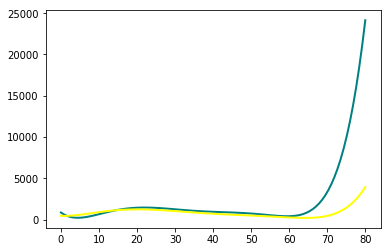

In [252]:
x_plot = np.linspace(0, 80, 100)
lw = 2

train_m_l = train[train['Sex'] == 0][train['Sales Date M'] > 6][train['Sales Date M'] < 12]
train_m_z = pd.concat([train[train['Sex'] == 0][train['Sales Date M'] <= 6], train[train['Sex'] == 0][train['Sales Date M'] >= 12]])

test_m_l = test[test['Sex'] == 0][test['Sales Date M'] >  6][test['Sales Date M'] < 12]
test_m_z = pd.concat([test[test['Sex'] == 0][test['Sales Date M'] <= 6], test[test['Sex'] == 0][test['Sales Date M'] >= 12]])

train_f_l = train[train['Sex'] == 1][train['Sales Date M'] >  6][train['Sales Date M'] < 12]
train_f_z = pd.concat([train[train['Sex'] == 1][train['Sales Date M'] <= 6], train[train['Sex'] == 1][train['Sales Date M'] >= 12]])

test_f_l = test[test['Sex'] == 1][test['Sales Date M'] >  6][test['Sales Date M'] < 12]
test_f_z = pd.concat([test[test['Sex'] == 1][test['Sales Date M'] <= 6], test[test['Sex'] == 1][test['Sales Date M'] >= 12]])

model_m_l = make_pipeline(PolynomialFeatures(6), Ridge())
model_m_z = make_pipeline(PolynomialFeatures(6), Ridge())
model_f_l = make_pipeline(PolynomialFeatures(6), Ridge())
model_f_z = make_pipeline(PolynomialFeatures(6), Ridge())


model_m_l.fit(train_m_l['Age'].values.reshape(-1, 1), train_m_l['Price'].values.reshape(-1, 1))
model_m_z.fit(train_m_z['Age'].values.reshape(-1, 1), train_m_z['Price'].values.reshape(-1, 1))

model_f_l.fit(train_f_l['Age'].values.reshape(-1, 1), train_f_l['Price'].values.reshape(-1, 1))
model_f_z.fit(train_f_z['Age'].values.reshape(-1, 1), train_f_z['Price'].values.reshape(-1, 1))


y_plot = model_m_l.predict(x_plot.reshape(-1, 1))
plt.plot(x_plot, y_plot, color='teal', linewidth=lw)

y_plot = model_f_l.predict(x_plot.reshape(-1, 1))
plt.plot(x_plot, y_plot, color='yellow', linewidth=lw)

plt.show()

In [253]:
scoreM = model_m_z.score(test_m_z['Age'].values.reshape(-1, 1), test_m_z['Price'].values.reshape(-1, 1))
scoreF = model_f_z.score(test_f_z['Age'].values.reshape(-1, 1), test_f_z['Price'].values.reshape(-1, 1))

error = mean_squared_error(list(test_m_z['Price'].values.reshape(-1, 1))+list(test_f_z['Price'].values.reshape(-1, 1)),
                           list(model_m_z.predict(test_m_z['Age'].values.reshape(-1, 1)))+list(model_f_z.predict(test_f_z['Age'].values.reshape(-1, 1))))

print(f"Poprawnosć predykcji mężczyzn wynosi: {scoreM}")
print(f"Poprawnosć predykcji kobiet wynosi: {scoreF}")
print(f"Błąd średniokwadratowy wynosi: {error}")

Poprawnosć predykcji mężczyzn wynosi: 0.18910222217107664
Poprawnosć predykcji kobiet wynosi: 0.3301502234136131
Błąd średniokwadratowy wynosi: 190251.61132887765
